## This solution is described about the Data Scientist Blog Post. CRISP-DM process will be applied.

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error
from sklearn.ensemble import RandomForestRegressor

# 1. Business Understanding

It would be quite interesting to apply data analysis skills here as a football fan. I chose FIFA 19 complete player dataset. I will fouc on mentioned below questions:

Q1. What is the ratio of total wages/ total potential for clubs. Which clubs are the most economical？

Q2. How is nation team player in total market value distributed?

Q3. Which player skils set influence potential/wage? Can we predict player/player's potential based on his skills set?

# 2. Data Understanding and Exploration

In [3]:
# Load dataset
fifa19_player_data_frame = pd.read_csv('data.csv')
fifa19_player_data_frame.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
# Number of players
fifa19_player_data_frame.shape[0]

18207

In [5]:
# Data format for each column
fifa19_player_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [6]:
# Types of informations in data set
fifa19_player_data_frame.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [7]:
# Missing values
fifa19_player_data_frame.isnull().sum()

Unnamed: 0                      0
ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          241
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                 48
International Reputation       48
Weak Foot                      48
Skill Moves                    48
Work Rate                      48
Body Type                      48
Real Face                      48
Position                       60
Jersey Number                  60
Joined                       1553
Loaned From                 16943
Contract Valid Until          289
Height                         48
Weight                         48
LS                           2085
ST            

# 3. Prepare Data

As per data exploration in above section, tthere are some necessary steps to be applied before preparing data:

1. Unused column to be dropted

2. String to be converted to number

3. Handle missing values, if necessary drop them

In [8]:
# Drop unused columns
columns_to_drop = ['Unnamed: 0', 'ID', 'Photo', 'Flag','Club Logo', 'Preferred Foot', 
                   'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From',
                   'Contract Valid Until', 'Height', 'Weight','LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
                   'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
                   'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause']

fifa19_player_data_frame.drop(columns_to_drop, axis=1, inplace=True)

In [9]:
# Display data after dropped column
fifa19_player_data_frame.head()

,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,2202,5.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,2228,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,2143,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,93,Manchester United,€72M,€260K,1471,4.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,€355K,2281,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [10]:
# Convert value and wage columns string to number
# Example: €110.5M = 110.5 * 1000000
def string2number(amount_str):
    """
    This function convert value and wage string to floating point number 
    
    Parameter:
    amount(str): Amount string with M & K as Abbreviation for Million and Thousands
    
    Returns:
    float: A float number represents the numerical value of the input parameter amount(str)
    """
    if amount_str[-1] == 'M':
        return float(amount_str[1:-1])*1000000
    elif amount_str[-1] == 'K':
        return float(amount_str[1:-1])*1000
    else:
        return float(amount_str[1:])

In [11]:
# First convert value, wage string to actual amount, then divide by 1 million and 1 thousand. 
# Assigned to new columns "Value_M and Wage_K respectively"
fifa19_player_data_frame['Value_M'] = fifa19_player_data_frame['Value'].apply(lambda x: string2number(x) / 1000000)
fifa19_player_data_frame['Wage_K'] = fifa19_player_data_frame['Wage'].apply(lambda x: string2number(x) / 1000)

# Drop original value & wage column
fifa19_player_data_frame.drop(['Value', 'Wage'], axis=1, inplace=True)

In [12]:
# Display data set ater string to number conversion
fifa19_player_data_frame.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18207.000000,18207.000000
mean,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,49.734181,45.550911,52.298144,...,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887,2.410696,9.731312
std,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,18.364524,19.525820,17.379909,...,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119,5.594933,21.999290
min,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,5.000000,2.000000,4.000000,...,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,38.000000,30.000000,44.000000,...,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000,0.300000,1.000000
50%,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,54.000000,49.000000,56.000000,...,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000,0.675000,3.000000
75%,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,64.000000,62.000000,64.000000,...,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000,2.000000,9.000000
max,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,93.000000,95.000000,94.000000,...,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000,118.500000,565.000000


In [13]:
# Find player Name who's Value is highest
fifa19_player_data_frame.loc[fifa19_player_data_frame['Value_M'].idxmax()]

Name                                  Neymar Jr
Age                                          26
Nationality                              Brazil
Overall                                      92
Potential                                    93
Club                        Paris Saint-Germain
Special                                    2143
International Reputation                      5
Weak Foot                                     5
Skill Moves                                   5
Work Rate                          High/ Medium
Position                                     LW
Crossing                                     79
Finishing                                    87
HeadingAccuracy                              62
ShortPassing                                 84
Volleys                                      84
Dribbling                                    96
Curve                                        88
FKAccuracy                                   87
LongPassing                             

In [14]:
# Find player Name who's Wage is highest
fifa19_player_data_frame.loc[fifa19_player_data_frame['Wage_K'].idxmax()]

Name                              L. Messi
Age                                     31
Nationality                      Argentina
Overall                                 94
Potential                               94
Club                          FC Barcelona
Special                               2202
International Reputation                 5
Weak Foot                                4
Skill Moves                              4
Work Rate                   Medium/ Medium
Position                                RF
Crossing                                84
Finishing                               95
HeadingAccuracy                         70
ShortPassing                            90
Volleys                                 86
Dribbling                               97
Curve                                   93
FKAccuracy                              94
LongPassing                             87
BallControl                             96
Acceleration                            91
SprintSpeed

In [15]:
# Missing value handling
missing_player_data_frame = fifa19_player_data_frame[fifa19_player_data_frame['Agility'].isnull()]

In [16]:
missing_player_data_frame.describe()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K
count,48.000000,48.0,48.000000,48.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.000000,48.000000
mean,25.000000,62.0,66.833333,1562.229167,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.354375,1.687500
std,4.472136,0.0,5.272705,127.956981,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.117354,0.992659
min,17.000000,62.0,62.000000,1141.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.100000,1.000000
25%,22.000000,62.0,62.000000,1506.750000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,1.000000
50%,25.000000,62.0,65.500000,1576.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.337500,1.000000
75%,27.000000,62.0,70.000000,1664.250000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.425000,2.000000
max,37.000000,62.0,82.000000,1740.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650000,5.000000


## 3.1 Fifa19 data observation

From above analysis result there are 48 missing values that quite a few columns which are related to player's skills.

So there were 48 players that simply missing those values. But, to answer Question-1 and Question-2 we will reserve those players since there were no missing value in Value_M and Wage_K column.

To explain Question-3, we will drop those player rows since there are many missing values.

# 4. Answer Questions base on dataset

### Q1. What is the ratio of total wages/ total potential for clubs. Which clubs are the most economical？

In [17]:
club_wages = fifa19_player_data_frame.groupby('Club').sum()

In [18]:
club_player_count = fifa19_player_data_frame.groupby('Club').count()

In [19]:
# Total Number of clubs and average number of players in each club
print('Total Number of clubs is {}'.format(club_player_count.shape[0]))
print('Players average in each club is {}'.format(round(club_player_count['Age'].mean(),2)))
print('Total Average wage(K) potential ratio is {}'
      .format(round(club_wages['Wage_K'].sum() / club_wages['Potential'].sum(), 2)))

Total Number of clubs is 651
Players average in each club is 27.6
Total Average wage(K) potential ratio is 0.14


In [20]:
club_wages['Wage/Potential'] = club_wages['Wage_K'] / club_wages['Potential']
club_wages['Player Number'] = club_player_count['Age']
club_wages['Player Average Age'] = club_wages['Age'] / club_wages['Player Number']

In [21]:
club_wages.sort_values('Wage/Potential', ascending=False, inplace=True)

In [22]:
club_wages.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Crossing,Finishing,HeadingAccuracy,...,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K,Wage/Potential,Player Number,Player Average Age
Club,,,,,,,,,,,,,,,,,,,,,
Real Madrid,793,2582,2793,60025,69.0,106.0,94.0,1934.0,1750.0,1887.0,...,627.0,627.0,583.0,579.0,615.0,874.425,5017.0,1.796276,33,24.030303
FC Barcelona,787,2575,2815,60791,74.0,108.0,94.0,1974.0,1805.0,1850.0,...,599.0,601.0,623.0,615.0,617.0,852.600,4837.0,1.718295,33,23.848485
Juventus,679,2057,2138,47610,63.0,80.0,72.0,1517.0,1282.0,1583.0,...,419.0,402.0,386.0,438.0,450.0,704.475,3292.0,1.539757,25,27.160000
Manchester City,789,2532,2769,60617,69.0,104.0,92.0,1970.0,1726.0,1852.0,...,592.0,570.0,578.0,577.0,560.0,786.555,3741.0,1.351029,33,23.909091
Manchester United,817,2549,2728,62117,69.0,106.0,100.0,2054.0,1862.0,2056.0,...,547.0,545.0,563.0,537.0,565.0,588.850,3391.0,1.243035,33,24.757576


Text(0.5,1,'Top 10 clubs spending wage on players potential')

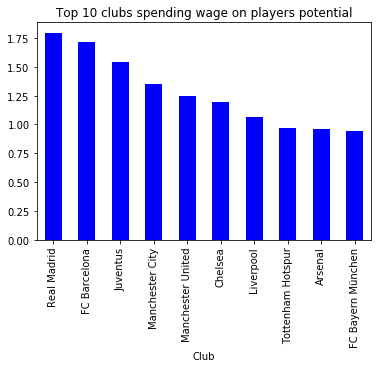

In [23]:
club_wages['Wage/Potential'].head(10).plot(kind='bar', color='Blue')
plt.title('Top 10 clubs spending wage on players potential')

Text(0.5,1,'Top 10 economical clubs ')

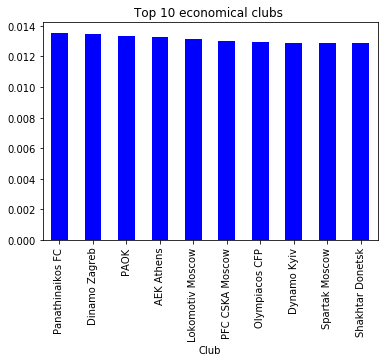

In [24]:
club_wages['Wage/Potential'].tail(10).plot(kind='bar', color='Blue')
plt.title('Top 10 economical clubs ')

From the above analysis and plot, the Real Madrid, Barcelona, and Juventus club are willing to spend more wage for high potential players than other clubs.

The economical clubs are not famous and from nowhere that we heard about. Few of them are quite famous like AEK Athens, Dynamo Kyiv may be more. This conclude that those club's players are potiential but underpayed. It would be good approach for 'Giant' clubs to bring more econimical players to reduce their overall wage spent.

### Q2. How is nation team player in total market value distributed?

In [25]:
# Age count
age_count = fifa19_player_data_frame['Age'].value_counts()
age_count.sort_index(ascending=True, inplace=True)

In [26]:
# Calculate average overall rating
age_mean = fifa19_player_data_frame.groupby('Age').mean()

In [27]:
# Collect age distribuion and overall rating together
age_count_list = age_count.values.tolist()
age_overall_rating_list = age_mean['Overall'].values.tolist()

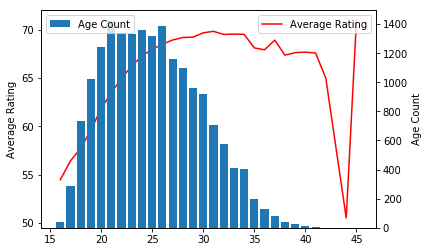

In [30]:
# Plot age distribution and overall rating together
age = age_count.index.values.tolist()
figure = plt.figure()
axis_1 = figure.add_subplot(111)
axis_1.plot(age,age_overall_rating_list, color = 'red', label='Average Rating')
axis_1.legend(loc=1)
axis_1.set_ylabel('Average Rating')

axis_2 = axis_1.twinx()
plt.bar(age, age_count_list, label='Age Count')
axis_2.legend(loc=2)
axis_2.set_ylabel('Age Count')
plt.show()

In figure above, we can see that most of the players are between 20-26 years age. The number of player's start decreases after 26 years age and much more decreases after 30. The main reasons could be that, many young player didn't get enough opportunities to prove themselves as a football player.

In ideal scenario, When a football player reaches their age of 20 years, they must have gain enough experience and reaches peak of their rating. The golden era for most of the football player starts 20 years of there age and ends when age reaches 35 years. Most of the football playes physical body condition drops quickly after their 35 years of age and rating quite low.

But there are also set of player's rating can remain quite high with age over 37, 38 years.

### Q3. Which player skils set influence potential/wage? Can we predict player/player's potential based on his skills set?

In [31]:
# Drop unused columns to answers Question-3
columns_to_drop_q3 = ['Name', 'Nationality', 'Club']
fifa19_player_data_frame.drop(columns_to_drop_q3, axis=1, inplace=True)

In [32]:
# Drop players whose skill set is missing.
fifa19_player_data_frame.dropna(axis=0, how='any', inplace=True)

In [33]:
# Split Work Rate is in format of attack work rate and defence work rate
# Create two new columns here.
fifa19_player_data_frame['Work Rate Attack'] = fifa19_player_data_frame['Work Rate'].map(lambda x: x.split('/')[0])
fifa19_player_data_frame['Work Rate Defence'] = fifa19_player_data_frame['Work Rate'].map(lambda x: x.split('/')[1])

In [34]:
#Drop origin Work Rate column
fifa19_player_data_frame.drop('Work Rate', axis=1, inplace=True)

In [35]:
fifa19_player_data_frame.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Position,Crossing,Finishing,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K,Work Rate Attack,Work Rate Defence
0,31,94,94,2202,5.0,4.0,4.0,RF,84.0,95.0,...,26.0,6.0,11.0,15.0,14.0,8.0,110.5,565.0,Medium,Medium
1,33,94,94,2228,5.0,4.0,5.0,ST,84.0,94.0,...,23.0,7.0,11.0,15.0,14.0,11.0,77.0,405.0,High,Low
2,26,92,93,2143,5.0,5.0,5.0,LW,79.0,87.0,...,33.0,9.0,9.0,15.0,15.0,11.0,118.5,290.0,High,Medium
3,27,91,93,1471,4.0,3.0,1.0,GK,17.0,13.0,...,13.0,90.0,85.0,87.0,88.0,94.0,72.0,260.0,Medium,Medium
4,27,91,92,2281,4.0,5.0,4.0,RCM,93.0,82.0,...,51.0,15.0,13.0,5.0,10.0,13.0,102.0,355.0,High,High


In [36]:
# One Hot Encoding for Position, Work Rate Attack and Work Rate Defence
one_hot_columns = ['Position', 'Work Rate Attack', 'Work Rate Defence']
fifa19_player_data_frame = pd.get_dummies(fifa19_player_data_frame, columns=one_hot_columns, prefix = one_hot_columns)

In [37]:
fifa19_player_data_frame.shape

(18147, 76)

# 5. Train model and Performance Evaluation

In [38]:
y = fifa19_player_data_frame['Potential']
X = fifa19_player_data_frame.drop(['Value_M', 'Wage_K', 'Potential', 'Overall'], axis=1)

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

In [40]:
forest_regressor = RandomForestRegressor(n_estimators=500)
forest_regressor.fit(X_train, y_train)
y_test_preds = forest_regressor.predict(X_test)
print(r2_score(y_test, y_test_preds))
print(mean_squared_error(y_test, y_test_preds))

0.871234108875
4.92077194123


In [41]:
coefs_df = pd.DataFrame()

coefs_df['Features'] = X_train.columns
coefs_df['Coefs'] = forest_regressor.feature_importances_
coefs_df.sort_values('Coefs', ascending=False).head(10)

,Features,Coefs
14,BallControl,0.267841
18,Reactions,0.197541
0,Age,0.178508
32,StandingTackle,0.067931
38,GKReflexes,0.026687
34,GKDiving,0.023207
1,Special,0.018934
7,HeadingAccuracy,0.016886
31,Marking,0.015428
26,Interceptions,0.015267


As a football fan we know, ball control, reactions, and age are the main three features that describe player's potential and performance. In this analysis our perception is also same.

Players with excellent ball control and fast reactions tends to give us an outstanding performance in football match.

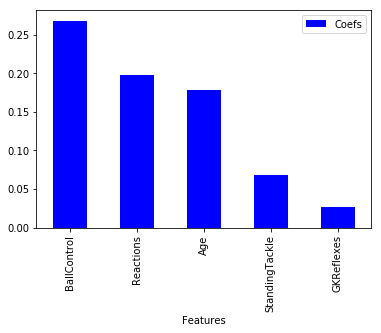

In [42]:
coefs_df.set_index('Features', inplace=True)
coefs_df.sort_values('Coefs', ascending=False).head(5).plot(kind='bar', color='Blue')